#                                              Prueba 1 Simulación
# Nombre: Byron Calva

Enunciado:

•	Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:

◦	Se tiene los datos de las provincias contigadas por COVID-19, los mismo que se encuentran en el siguiente link (https://public.flourish.studio/visualisation/1631922/?utm_source=showcase&utm_campaign=visualisation/1631922), estos datos estan disponibles en el Avac dentro del apartado Prueba – Practica, con estos datos obtener los siguientes modelos:

▪	Generar un modelo matematico de prediccion para regresion lineal, exponencial, polinomico y logaritmico, de los nuevos contactos en la proxima semana (7 dias despues).




Coefficients: 
 [4.39687055]
Independent term: 
 -351.8179231863442
[ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119]


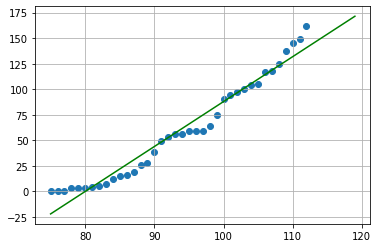

[75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112]


In [1]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

# Obtener y depurar los casos de la provincia del Carchi
df_General = pd.read_excel('Casos.xlsx')
df_General = df_General.iloc[2,:]

confirmados = list(df_General.iloc[1:len(df_General)])
dias = list(df_General.index[1:len(df_General)])
df_Provincia = pd.DataFrame(columns=('Días', 'Confirmados'))

for x in range(0,len(dias)):
    df_Provincia.loc[len(df_Provincia)] = [dias[x], confirmados[x]]
FMT = '%d/%m/%Y'
date = df_Provincia['Días']
df_Provincia['Días'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("01/01/2020", FMT)).days)

# Generar el modelo de regresión lineal para la predicción de 7 días (día 75+45 = 120)
x = list(df_Provincia.iloc [:, 0]) # Fecha
y = list(df_Provincia.iloc [:, 1]) # Numero de casos
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
print()
regr.fit(np.array(x).reshape(-1, 1) ,y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

#df_Provincia
#Graficar
plt.scatter(x, y)
x_real = np.array(range(75, 120))
print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.grid()
plt.show()
print(x)

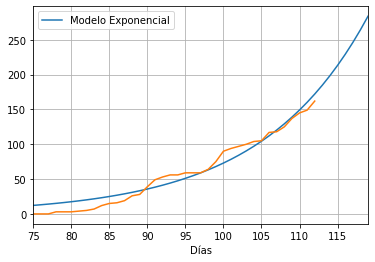

In [184]:
# Generar el modelo exponencial para la predicción de 7 días (día 75+45 = 120)
x_Exp = x[:]
y_Exp = y[:]
def genExp(varIn, a, b):
    return a*np.exp(b*varIn)
# Creación de dataframes para el almacenamieto de los resultados
modeloExp = pd.DataFrame(columns=('Días', 'Modelo Exponencial'))

parametros, valoresCovarianza = curve_fit(genExp, x_Exp, y_Exp, p0=(0,0))

# Asignación de valores a la variable dependiente según la ecuación anterior
x_Pred = np.array(range(75, 120))
for pred in x_Pred:
    modeloExp.loc[len(modeloExp)] = [pred,genExp(pred, parametros[0], parametros[1])]
# Gráfico del modelo exponencial
modeloExp.plot(x='Días', y='Modelo Exponencial')
plt.plot(x_Exp,y_Exp)
plt.grid()

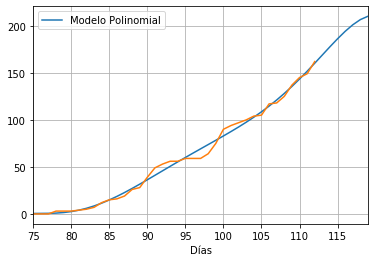

In [189]:
# Generar el modelo polinómico para la predicción de 7 días (día 75+45 = 120)
modeloPol = pd.DataFrame(columns=('Días', 'Modelo Polinomial'))
# Obtención de la ecuación polinomial de grado 'n'
y_polinomial = np.poly1d(np.polyfit(x,y,6))
# Asignación de valores a la variable dependiente según la ecuación anterior
for pred in x_Pred:
    modeloPol.loc[len(modeloPol)] = [pred, y_polinomial(pred)]
# Gráfico del modelo polinomial de grado 9    
modeloPol.plot(x='Días',y='Modelo Polinomial')
plt.plot(x, y)
plt.grid()

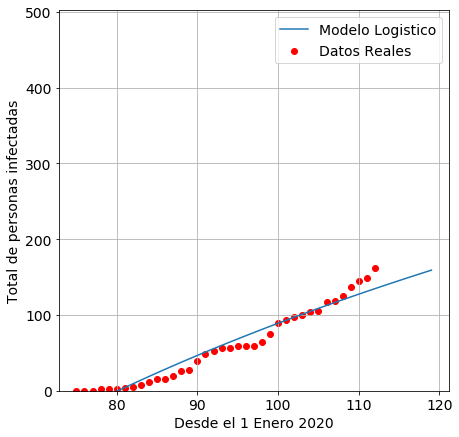

In [191]:
# Generar el modelo logarítmico para la predicción de 7 días (día 75+45 = 120)
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(x_Pred, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in x_Pred], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 1 Enero 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.grid()
plt.show()

▪	Calcular y generar el modelo SIR, con este dato obtener el betta y gamma, para ello solo emplear los datos de casos confirmados. Para ello se debe tomar la tasa de repoduccion efectiva que se calcula como

Re = R0*N (Poblacion total tomada la simulacion) [1]

<Figure size 504x504 with 0 Axes>

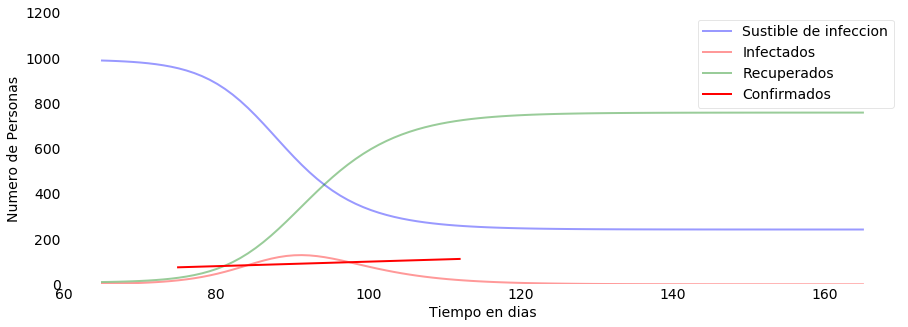

Beta:  0.4867384335804301
Gamma:  0.2587685665420739
R0:  1.8809797499159928
Re:  1880.979749915993


In [207]:
# Importación de los casos 
def loss(point, confirmados, S0, I0, R0):
    size = len(confirmados)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [S0, I0, R0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - confirmados)**2))

def deriv(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

#Numero habitantes del Ecuador
N=1000
#casos confirmados
I0=2
#Recuperados
R0=10
#Resto de la poblacion
S0= N - I0 - R0

# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0

x_confirmados = x

y = x[:]

# Estimar beta y gamma con los casos confirmados
optimal = minimize(loss,[0.001, 0.001],args=(y, S0, I0, R0),
                   method='L-BFGS-B',bounds=[(0.00000001, 0.4), (0.00000001, 0.4)]
                  )
beta, gamma = optimal.x
beta = beta*1000
t = np.linspace(65, 165, 100)

# Vector de condiciones iniciales
y0 = S0, I0, R0

ret = odeint(deriv, y0, t, args=(beta, gamma))
S, I, R = ret.T # Obtenicion de resultados

fig = plt.figure(facecolor='w')
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha = 0.4, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha = 0.4, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha = 0.4, lw=2, label='Recuperados')
ax.plot(x_confirmados, y, 'r',lw=2, label = 'Confirmados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()
R0 = beta/gamma
Re = R0*N
print("Beta: ",beta)
print("Gamma: ",gamma)
print("R0: ",R0)
print("Re: ",Re)

▪	Obtener el Re para generar una simulacion de epidimiologica y su grado de difusion, para ello obtener el numero de muertos, recuperados e infectados.

In [1]:
from random import randrange
import pygame
import os
from time import time

#Parametros de inicio
PROBA_MUERTE = 8.4  # Probabilidad de que la gente muera COVID
CONTAGION_RATE = 1880.979749915993  # Factor R0 para la simulacion COVID probabilidad (en este caso Re)
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0 # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = 25 # Tiempo de un dia en milisegundos (Cada 25 es un dia)
nb_rows = 30 #Numero de filas
nb_cols = 30 #Numero de columnas
os.environ['SDL_VIDEO_CENTERED'] = '1' # Centrar la simulación

global display, myfont, states, states_temp #Declaracion de variables globales

#Declaro colores en formato RGB
WHITE = (255, 255, 255) 
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)

# Tiempo de ejecución
tiempo_Inicial = time()
tiempo_Actual = 0

#Obtiene los vecinos dado un punto x,y
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2]

#Genero las personas que cuentan con inmunidad o vacuna 
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

#Funcion que permite contar el numero de muertos 
def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

def contar_recuperados():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 1:
                contador +=  1
    return contador

#Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[15][15] = 10 # Estado inicial de la simulacion
it = 0 # Variable para contar las Iteraciones
total_muerte = 0 # Contabiliza el numero de muertos
recuperados = 0 # Contabiliza el numero de muertos
vacunar() #Llamar a la funcion vacunar
dias = 0

pygame.init() #Incializo el motor de juegos pygame
pygame.font.init()
display=pygame.display.set_mode((800,750),0,32) #Tamanio de la ventana
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")# Titulo
font=pygame.font.SysFont('Calibri', 40) # Tipo de letra
display.fill(WHITE) # Color de fondo

# Coordenadas de x & y para la asignación de los estados
px = 105
py = 105

while True:
    pygame.time.delay(SIMULACION_SPEED) # Sleep o pausa
    it += 1
    if it <= 10000 and it >= 1:
        dias = int(tiempo_Actual/0.025)
        states_temp = states.copy()
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10:
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE:
                        states_temp[x][y] = -1 # Muere
                    else:
                        states_temp[x][y] = 1 # Cura
                if state >= 10 and state <= 20:
                    if randrange(99) < PROBA_INFECT: # Infecto a las personas cercanas entre  10 y 20 
                        neighbour = get_vecinos(x, y) 
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0:
                            states_temp[x2][y2] = 10
        states = states_temp.copy()
        total_muerte = contar_muertes() # contar el numero de muertos
        recuperados = contar_recuperados()
        
    pygame.draw.rect(display, WHITE, (105, 20, 800, 90)) # Grafico la fondo
    textsurface = font.render("Muertes: "+ str(total_muerte), False, (255,160,122)) #El numero de muertos
    display.blit(textsurface, (285, 20))
    dias_Transcurridos = font.render("Días: "+ str(dias), False, (255,160,122)) #El numero de muertos
    display.blit(dias_Transcurridos, (105, 60))
    recuperados = font.render("Recuperados: "+ str(recuperados), False, (255,160,122)) #El numero de muertos
    display.blit(recuperados, (400, 60))
    #Graficar el estado del paciente matriz
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE # No infectado
            if states[x][y] == 1:
                color = GREEN # Recupero
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50) # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK # Muerto
            pygame.draw.circle(display, color, (px, py), 2)
            py += 6
        py = 105
        px += 6
    px = 105
    #Escuachar los eventos del teclado
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE: #Presiona y Escape
            pygame.quit() #Termino simulacion
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE: #Presiona y espacio
            #Reiniciamos valores
            tiempo_Inicial = time()
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[50][50] = 10
            it = 0
            total_muerte = 0
            dias = 0
            vacunar()
            
    tiempo_Actual = time() - tiempo_Inicial
    pygame.display.update()# Mandar actualizar la ventana

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


error: video system not initialized

<img src = "http://localhost:8888/notebooks/Documents/GitHub/Simulaci%C3%B3n-Tarea/Prueba1/Imagen.png"/>

▪	Finalmente, contrarestar los modelos matematicos y generar las siguientes conclusiones

•	Cual tiene una mejor prediccion

La mejor predicción fue la del modelo polinomial ya que fue el que mejor se adaptó a la curva
•	Ventajas y desventajas de los modelos.
La ventaja de los modelos lineal, exponencial y logístico son su fácil implementación pero esto se ve afectado al momento de representar los resultados

La ventaja de los modelos polinomial y SIR se centra en su precisión al momento de predecir los futuros eventos que se darán, y su desventaja es en cambio, la complejidad de su utilización en comparación con los mencionados anteriormente

•	El proceso de simulación desarrollado deberá considerar los siguientes aspectos:

◦	Se debe establecer un modelo basado en modelos matematicos.

◦	El programa deberá generar gráficas que indiquen la ecuacion matematica y probabilistica de tendencias, modelo SIR y 
expancion epidimiologica.

◦	Deben calcularse las siguientes métricas:

▪	Betta, gamma y Re.

▪	Total de infectados dentro de 7 dias (matematico y probabilistico).

▪	Cuantas personas fallecen, recuperan y sustible de la simulacion.